# Titanic survivors - A Simple Guide For Your First Data Sciecne Project

DataSet: https://www.kaggle.com/c/titanic

Here in this problem statement we will try to predict whether a person survived the shipwreck or not.

AIM: To Predict if a passenger has survived or not, wherein '0' is for not surviving, '1' for surviving.

Article: https://www.analyticsvidhya.com/blog/2021/05/titanic-survivors-a-guide-for-your-first-data-science-project/?utm_source=twitter&utm_medium=social&utm_campaign=new-article&utm_content=B&custom=FBI252

### Importing basic libraries

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
train = pd.read_csv("E:\Jupyter Notebook\Data Analysis Of Titanic Dataset\dataset/train.csv")

test = pd.read_csv("E:\Jupyter Notebook\Data Analysis Of Titanic Dataset\dataset/test.csv")


In [4]:
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
83,84,0,1,"Carrau, Mr. Francisco M",male,28.0,0,0,113059,47.1000,NaN,S
806,807,0,1,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0000,A36,S
813,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.2750,NaN,S
861,862,0,2,"Giles, Mr. Frederick Edward",male,21.0,1,0,28134,11.5000,NaN,S
489,490,1,3,"Coutts, Master. Eden Leslie ""Neville""",male,9.0,1,1,C.A. 37671,15.9000,NaN,S
316,317,1,2,"Kantor, Mrs. Sinai (Miriam Sternin)",female,24.0,1,0,244367,26.0000,NaN,S
783,784,0,3,"Johnston, Mr. Andrew G",male,NaN,1,2,W./C. 6607,23.4500,NaN,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.5500,NaN,S
661,662,0,3,"Badt, Mr. Mohamed",male,40.0,0,0,2623,7.2250,NaN,C
479,480,1,3,"Hirvonen, Miss. Hildur E",female,2.0,0,1,3101298,12.2875,NaN,S


In [5]:
test.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
76,968,3,"Miles, Mr. Frank",male,NaN,0,0,359306,8.0500,NaN,S
187,1079,3,"Davies, Mr. Joseph",male,17.0,2,0,A/4 48873,8.0500,NaN,S
303,1195,3,"Pokrnic, Mr. Tome",male,24.0,0,0,315092,8.6625,NaN,S
334,1226,3,"Cor, Mr. Ivan",male,27.0,0,0,349229,7.8958,NaN,S
17,909,3,"Assaf, Mr. Gerios",male,21.0,0,0,2692,7.2250,NaN,C


In [7]:
train['train_test'] = 1
test['train_test'] = 0
test['Survived'] = np.nan
data_concat = pd.concat([train,test])
data_concat.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [8]:
data_concat.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test'],
      dtype='object')

### Data Exploration

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  train_test   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [10]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train_test
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.0
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.0
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.0
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.0
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.0
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.0
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.0
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.0


In [12]:
# Seperate the data into numerical data and categorical Data

data_num = train[["Age", "SibSp", "Parch", "Fare"]]

data_cat = train[["Embarked", "Ticket", "Sex", "Survived", "Pclass", "Cabin"]]


### Plotting the numerical data

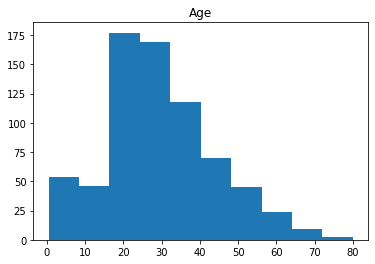

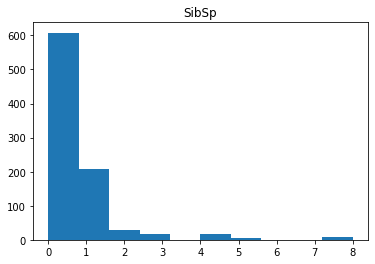

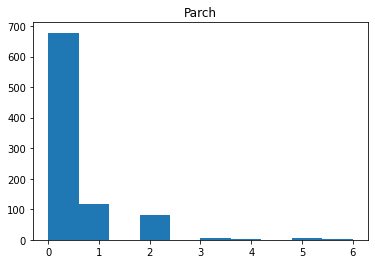

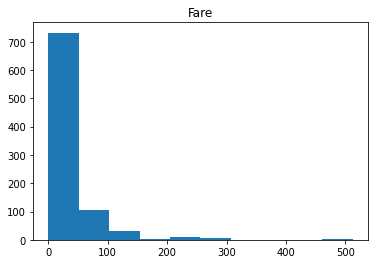

In [16]:
for i in data_num.columns:
    plt.hist(data_num[i])
    plt.title(i)
    plt.show()

Here, most of the distributions are scattered, except Age which is normalized.

<AxesSubplot:>

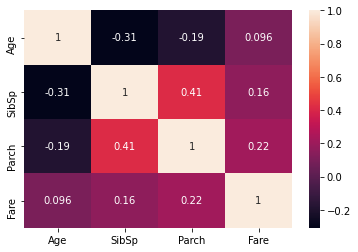

In [17]:
sns.heatmap(data_num.corr(), annot=True)

Here we can see that Parch and SibSp has a higher correlation, which generally makes sense since Parents are more likely to travel with their multiple kids and spouses tend to travel together.

<AxesSubplot:>

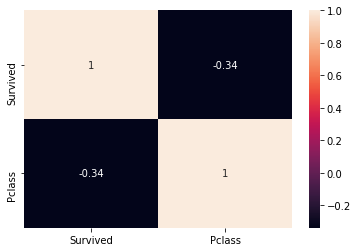

In [18]:
sns.heatmap(data_cat.corr(), annot = True)

#### Survival Rates Across The Numeric Variables

In [24]:
pd.pivot_table(data_concat, index = "Survived", values = ["Age", "SibSp", "Parch", "Fare"])

,Age,Fare,Parch,SibSp
Survived,,,,
0.0,30.626179,22.117887,0.329690,0.553734
1.0,28.343690,48.395408,0.464912,0.473684


Inferences:
1. The average age of survivors is 28, so young people tend to survive more.
2. People who paid higher fare rates were more likely to survive, more than double. This might be the people traveling in first-class. Thus the rich survived, which is kind of a sad story in this scenario.
3. In the 3rd column, If you have parents, you had a higher chance of surviving. So the parents might’ve saved the kids before themselves, thus explaining the rates
4. And if you are a child, and have siblings, you have less of a chance of surviving

### Plotting Categorical Data Variables

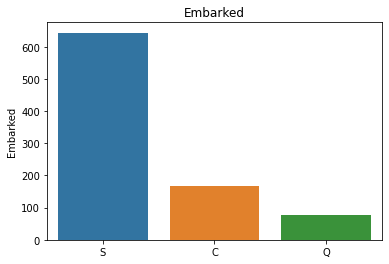

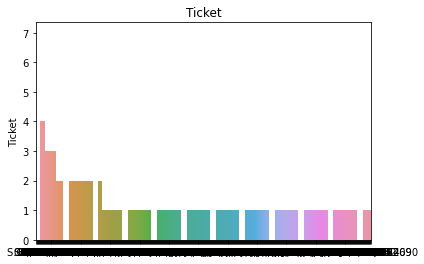

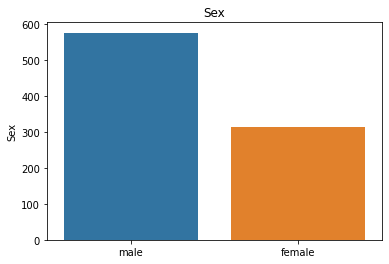

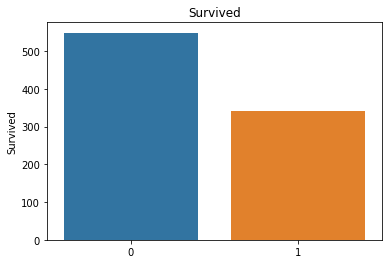

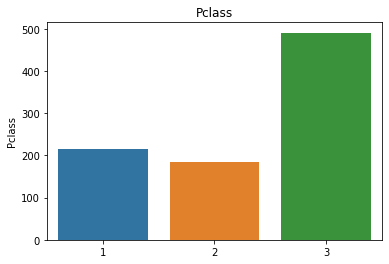

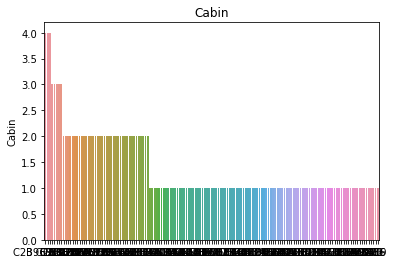

In [30]:
for i in data_cat.columns:
    sns.barplot(data_cat[i].value_counts().index, data_cat[i].value_counts())
    plt.title(i)
    plt.show()

Inferences:
1. The Ticket and Cabin graphs looks very messy, so we might need to perform feature engineering.
2. Most of the people died in the shipwreck, where only around 300 people survived.
3. Majority of the people had 3rd class ticket.
4. There were more MALES than FEMALES.
5. Most of the passengers boarded the ship from Southampton.

In [44]:
print(pd.pivot_table(data_concat, index = "Survived", columns = "Pclass", values = "Ticket", aggfunc = "count"))

print(pd.pivot_table(train, index = 'Survived', columns = 'Sex', values = 'Ticket' ,aggfunc ='count'))

print(pd.pivot_table(train, index = 'Survived', columns = 'Embarked', values = 'Ticket' ,aggfunc ='count'))

Pclass      1   2    3
Survived              
0.0        80  97  372
1.0       136  87  119
Sex       female  male
Survived              
0             81   468
1            233   109
Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


* Pclass: Here we can see a lot more people survived from the First class than the Second or the Third class, even though the total number of passengers in the First class was much much less than the Third class. Thus our previous assumption that the rich survived is confirmed here, which might be relevant to model building.
* Sex: Most of the women survived, and the majority of the male died in the shipwreck. So it looks like the saying “Woman and children first” actually applied in this scenario.
* Embarked: This doesn’t seem much relevant, maybe if someone was from “Cherbourg” had a higher chance of surviving.
 